In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [173]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["axes.unicode_minus"] = False

In [174]:
df = pd.read_excel("./data/covid19_full.xlsx")
df['날짜'] = df['날짜'].astype('datetime64')

In [175]:
df.head()

,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
0,2023-05-31,6204277,5987.0,0,NaN,NaN,6492,6.0,31703511.0,24411.0,0,NaN,17.0,34784
1,2023-05-30,6198290,3326.0,0,NaN,NaN,6486,1.0,31679100.0,13529.0,0,NaN,7.0,34767
2,2023-05-29,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
3,2023-05-28,6194964,1393.0,0,NaN,NaN,6485,1.0,31665571.0,6868.0,0,NaN,3.0,34760
4,2023-05-27,6191196,4078.0,0,NaN,NaN,6485,0.0,31647238.0,17796.0,0,NaN,3.0,34784


In [176]:
input_date = pd.to_datetime("2023-04-01")
input_date

Timestamp('2023-04-01 00:00:00')

In [177]:
end_date = input_date + dt.timedelta(days = 7)
end_date

Timestamp('2023-04-08 00:00:00')

In [178]:
df2 = df.query('날짜 >= @input_date and 날짜 < @end_date').copy()

In [179]:
df2.sort_values('날짜', inplace = True)

In [180]:
df2['날짜'] = df2['날짜'].apply(lambda x : x.strftime("%Y-%m-%d"))

In [181]:
df2

,날짜,서울시 누적 확진자,서울시 일일 확진,서울시 치료중,서울시 퇴원,서울시 추가 퇴원,서울시 누적 사망,서울시 일일 사망,전국 누적 확진,전국 일일 확진,전국 치료중,전국 퇴원,전국 당일 사망,전국 누적 사망
60,2023-04-01,5991150,2523.0,0,NaN,NaN,6383,1.0,30829827.0,10523.0,0,NaN,5.0,34270
59,2023-04-02,5993551,2401.0,0,NaN,NaN,6383,0.0,30829827.0,10523.0,0,NaN,5.0,34270
58,2023-04-03,5994393,842.0,0,NaN,NaN,6384,1.0,30843900.0,4349.0,0,NaN,7.0,34281
57,2023-04-04,5997981,3588.0,0,NaN,NaN,6387,3.0,30857275.0,13375.0,0,NaN,8.0,34289
56,2023-04-05,6001334,3353.0,0,NaN,NaN,6390,3.0,30871740.0,14465.0,0,NaN,7.0,34296
55,2023-04-06,6004221,2887.0,0,NaN,NaN,6393,3.0,30883824.0,12072.0,0,NaN,13.0,34309
54,2023-04-07,6006888,2667.0,0,NaN,NaN,6395,2.0,30894559.0,10735.0,0,NaN,9.0,34318


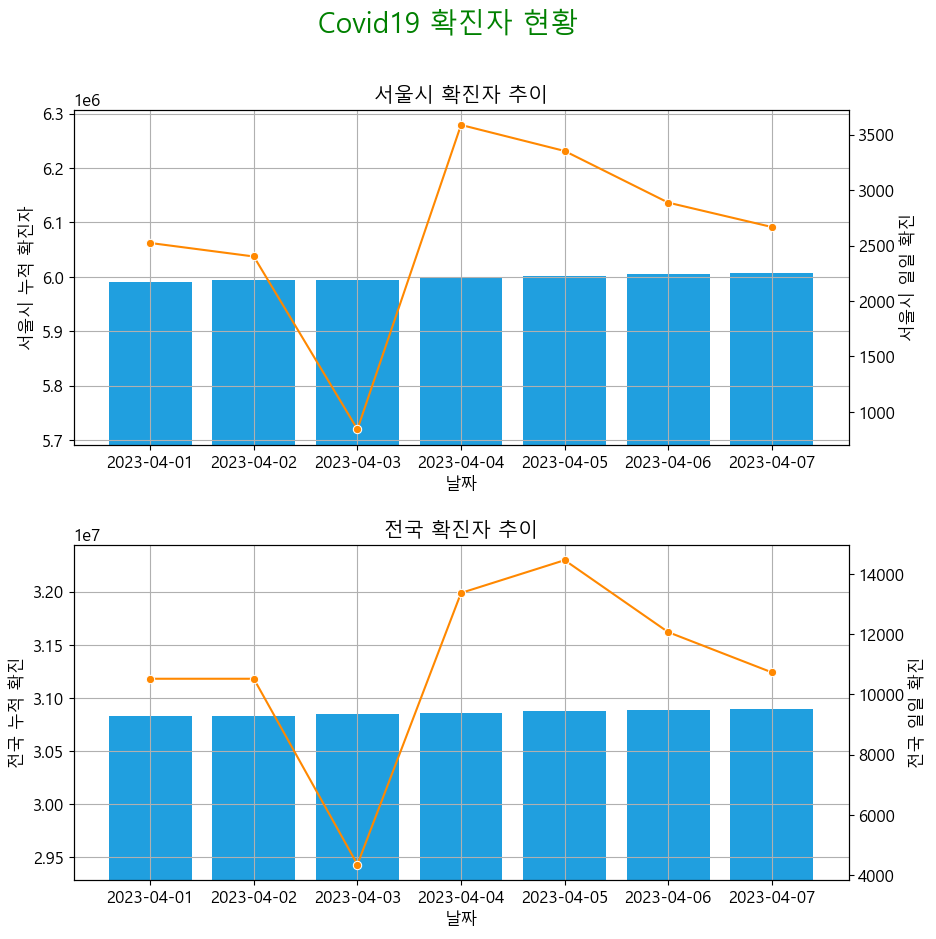

In [182]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
ax1_2 = ax1.twinx()
ax2_2 = ax2.twinx()
fig.suptitle("Covid19 확진자 현황", fontsize = 20, fontdict = {"color" : "green"})
ax1.set_title("서울시 확진자 추이")
ax2.set_title("전국 확진자 추이")
fig.subplots_adjust(wspace=0.2, hspace=0.3)

sb.barplot(ax = ax1, x = df2['날짜'], y = df2['서울시 누적 확진자'], color = "#00aaff")
ax1.set_ylim(df2['서울시 누적 확진자'].min()*0.95, df2['서울시 누적 확진자'].max()*1.05)
ax1.grid()
sb.lineplot(ax = ax1_2, data = df2, x = "날짜", y = "서울시 일일 확진", color = "#ff8800", marker='o')

sb.barplot(ax = ax2, x = df2['날짜'], y = df2['전국 누적 확진'], color = "#00aaff")
ax2.set_ylim(df2['전국 누적 확진'].min()*0.95, df2['전국 누적 확진'].max()*1.05)
ax2.grid()
sb.lineplot(ax = ax2_2, data = df2, x = "날짜", y = "전국 일일 확진", color = "#ff8800", marker='o')

plt.show()

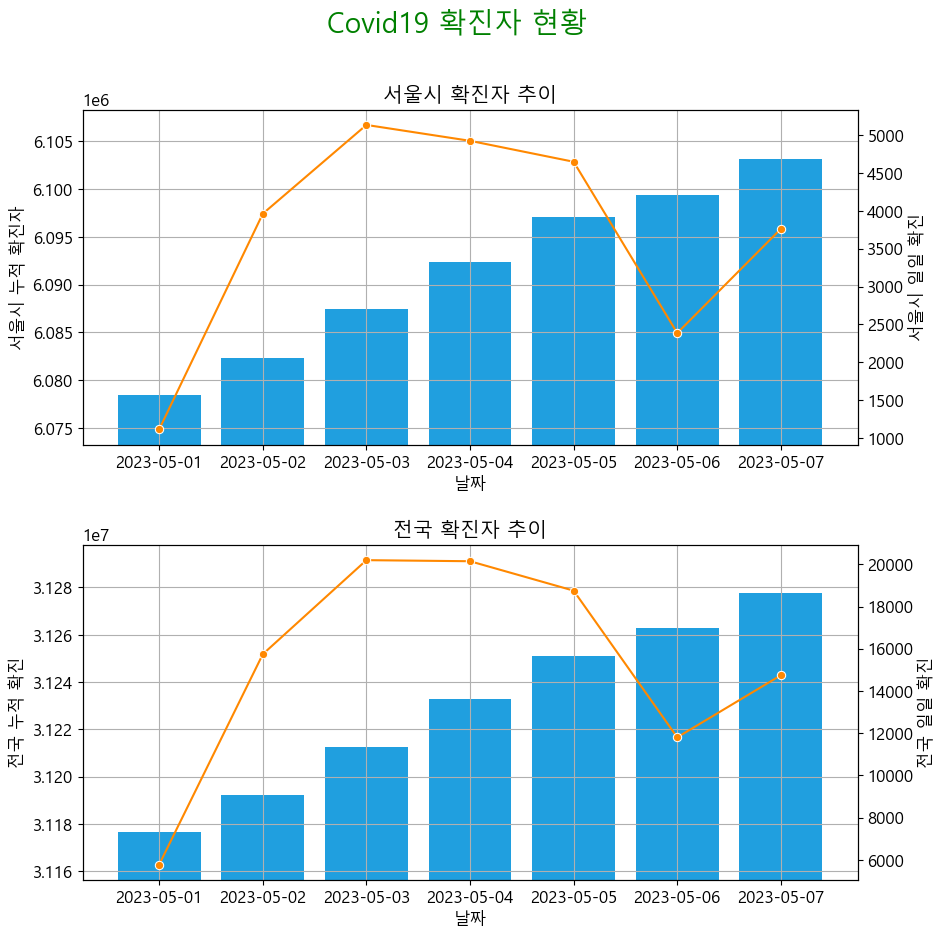

In [183]:
# 데이터 로드
df = pd.read_excel("./data/covid19_full.xlsx")

# 날짜 기준 시계열 데이터 필터링 및 정렬
df['날짜'] = df['날짜'].astype('datetime64')
input_date = pd.to_datetime(input("YYYYMMDD 입력"))
end_date = input_date + dt.timedelta(days = 7)
df2 = df.query('날짜 >= @input_date and 날짜 < @end_date').copy()
df2.sort_values('날짜', inplace = True)
df2['날짜'] = df2['날짜'].apply(lambda x : x.strftime("%Y-%m-%d"))

# 기본 서브플롯과 제목 세팅
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 10))
ax1_2 = ax1.twinx()
ax2_2 = ax2.twinx()
fig.suptitle("Covid19 확진자 현황", fontsize = 20, color = "green")
ax1.set_title("서울시 확진자 추이")
ax2.set_title("전국 확진자 추이")
fig.subplots_adjust(wspace=0.2, hspace=0.3)

# 서울시 확진자 추이 그래프 그리기
sb.barplot(ax = ax1, x = df2['날짜'], y = df2['서울시 누적 확진자'], color = "#00aaff")
ax1.set_ylim(df2['서울시 누적 확진자'].min()-df2['서울시 일일 확진'].max(), df2['서울시 누적 확진자'].max()+df2['서울시 일일 확진'].max())
ax1.grid()
sb.lineplot(ax = ax1_2, data = df2, x = "날짜", y = "서울시 일일 확진", color = "#ff8800", marker='o')

# 전국 확진자 추이 그래프 그리기
sb.barplot(ax = ax2, x = df2['날짜'], y = df2['전국 누적 확진'], color = "#00aaff")
ax2.set_ylim(df2['전국 누적 확진'].min()-df2['전국 일일 확진'].max(), df2['전국 누적 확진'].max()+df2['전국 일일 확진'].max())
ax2.grid()
sb.lineplot(ax = ax2_2, data = df2, x = "날짜", y = "전국 일일 확진", color = "#ff8800", marker='o')

# 그래프 표시
plt.savefig("./data/0111.png", dpi = 200, bbox_inches = "tight")
plt.show()

In [184]:
origin = pd.read_excel("./data/grade.xlsx", index_col = "이름")

In [185]:
origin.head()

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,77,88,64
영희,2,여자,88,120,62,72
민철,1,남자,92,70,83,79
수현,3,여자,63,60,31,71
호영,4,남자,75,50,90,88


In [186]:
df = origin.astype({"학년" : "category", "성별" : "category"})

In [187]:
df.dtypes

학년    category
성별    category
국어       int64
영어       int64
수학       int64
과학       int64
dtype: object

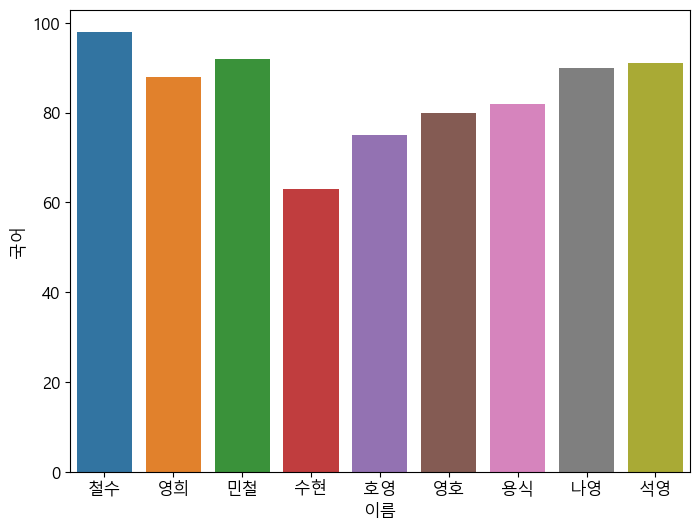

In [188]:
plt.figure
sb.barplot(data = df, x = df.index, y = '국어')
plt.show()

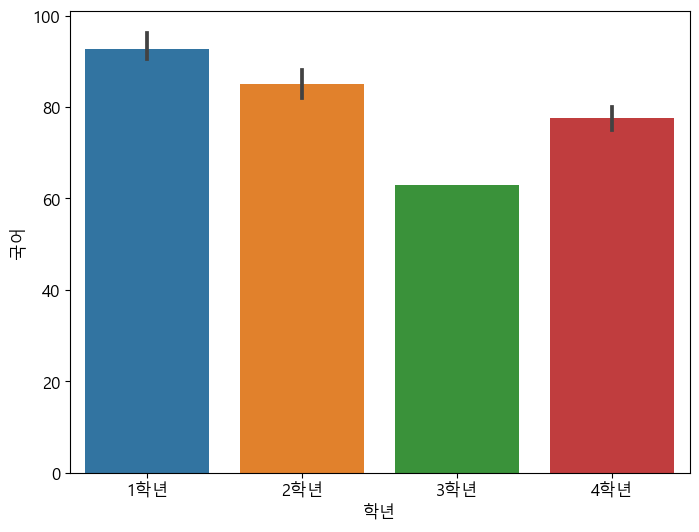

In [189]:
plt.figure()
sb.barplot(data = df, x = '학년', y = '국어')
plt.xticks([0, 1, 2, 3], ['1학년', '2학년', '3학년', '4학년'])
plt.show()

- x축 데이터 다수가 중복되면 x축은 해당 값의 평균으로 처리하며 95% 신뢰구간에 대한 범위를 막대로 표기함
  - 해당 신뢰구간은 ci 파라미터로 수정 가능
  - errorbar를 'sd'로 설정하면 신뢰구간이 아닌 표준편차를 표기함

- melt
  - id_vars : 유지할 컬럼 명
  - value_vars : 데이터를 재배치할 컬럼 명

In [190]:
df2 = df.reset_index()
df2 = pd.melt(df2, id_vars = '이름', value_vars = ['국어', '영어', '수학'], 
            var_name = '과목', value_name = '점수')
df2.sort_values(['이름', '과목'])

,이름,과목,점수
7,나영,국어,90
25,나영,수학,81
16,나영,영어,92
2,민철,국어,92
20,민철,수학,83
11,민철,영어,70
8,석영,국어,91
26,석영,수학,89
17,석영,영어,90
3,수현,국어,63


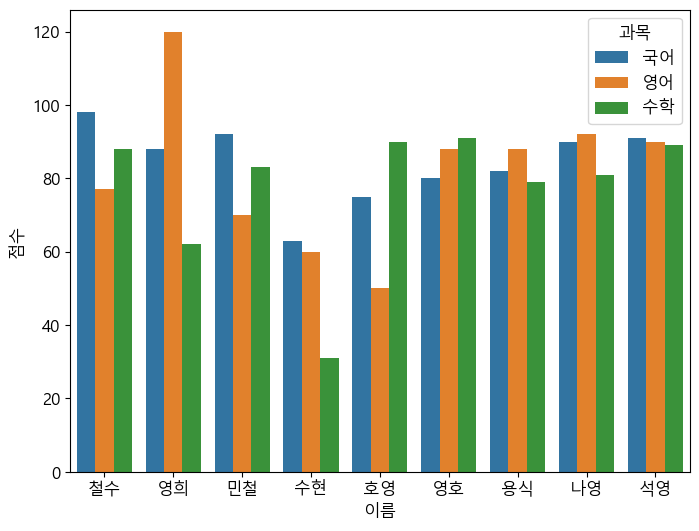

In [191]:
plt.figure()
sb.barplot(data = df2, x = '이름', y = '점수', hue = '과목', estimator = 'median')
plt.show()

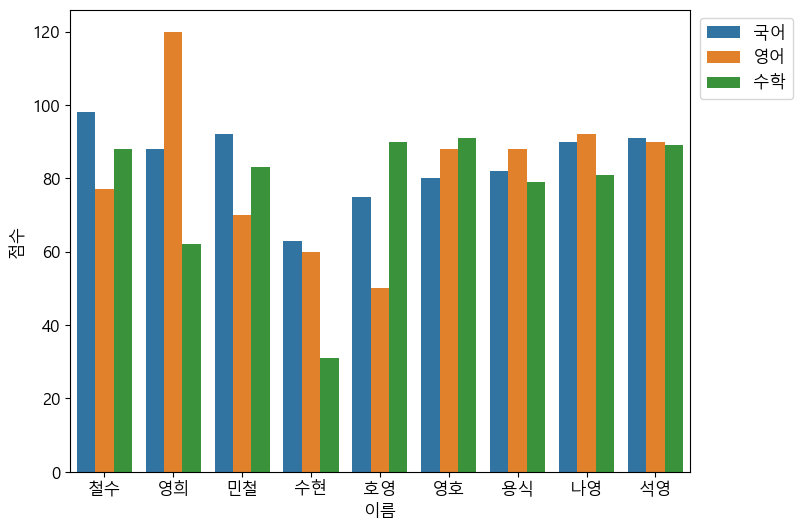

In [192]:
plt.figure()
sb.barplot(data = df2, x = '이름', y = '점수', hue = '과목', estimator = 'median')
plt.legend(bbox_to_anchor = (1.18, 1))
plt.show()

- barplot의 가로막대화 : orient를 h로 지정

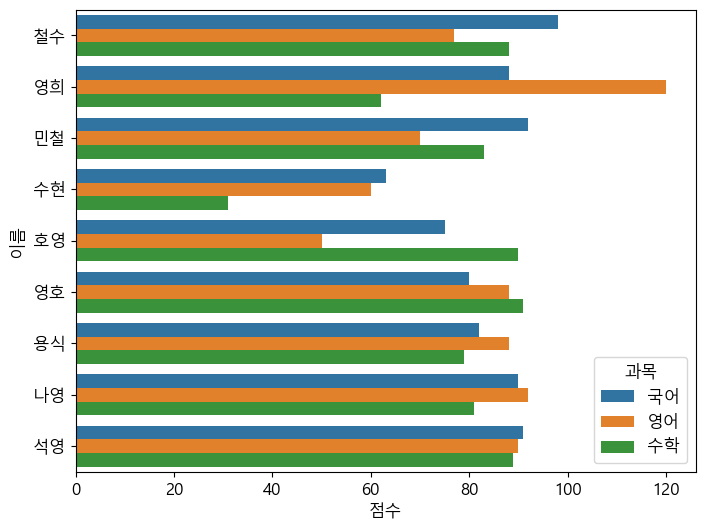

In [193]:
plt.figure()
sb.barplot(data = df2, y = '이름', x = '점수', hue = '과목', estimator = 'median', orient = 'h')
plt.show()

In [194]:
df = pd.read_excel("./data/titanic.xlsx")

In [195]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- Catplot : 빈도 막대 그래프
  - x축으로 집단을 구분할 수 있는 범주형 변수를 지정
  - 다양한 종류의 그래프를 제공

In [196]:
df = df.astype({"Survived" : "category", "Pclass" : "category", "Sex" : "category", "Cabin" : "category", "Embarked": "category"})

In [197]:
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [198]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


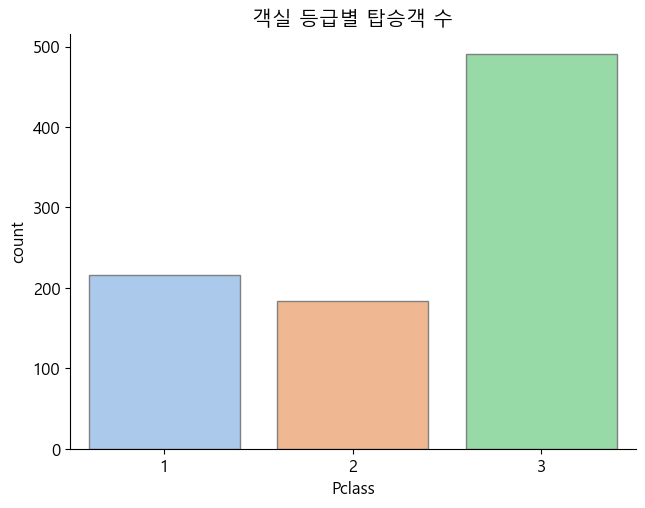

In [199]:
g = sb.catplot(data = df, x = 'Pclass', kind = 'count',
               palette = 'pastel', edgecolor = '0.5')

g.fig.set_figwidth(7)
g.fig.set_figheight(5)

plt.title("객실 등급별 탑승객 수")
plt.show()

- kind 파라미터로 다양한 그래프 제공

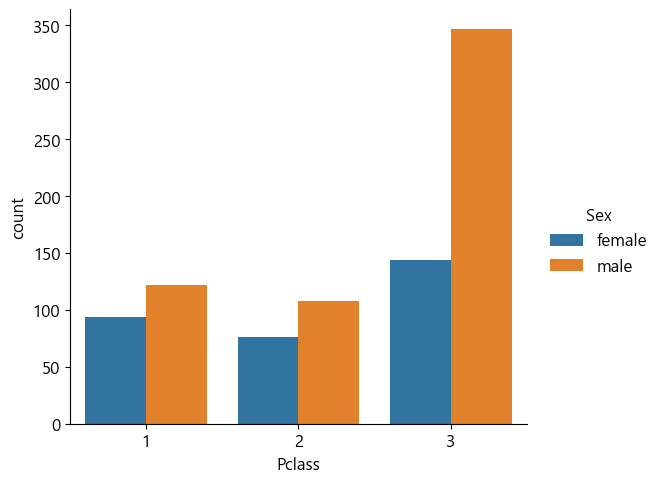

In [206]:
g = sb.catplot(data=df,
            x='Pclass',     # 집단을 구분하는 기준
            kind='count',    # 빈도 막대그래프 그리기
            hue='Sex'
        )

g.fig.set_figwidth(7)
g.fig.set_figheight(5)

plt.show()
plt.close()

- col 파라미터로 별도 그래프로 범주 분리 가능, hue 사용시 각 그래프별로 다른 범주가 분리되어 표기됨

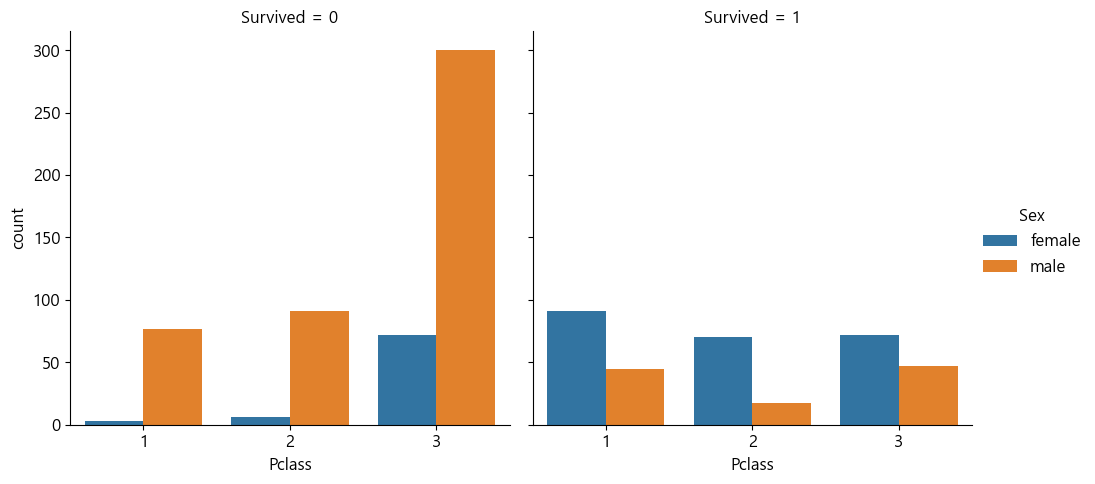

In [207]:
sb.catplot(data=df,
            x='Pclass',
            hue='Sex',       # 데이터 범주 설정
            col='Survived',  # 캔버스 분리하기
            kind='count'     # 빈도 막대그래프 그리기
        )

plt.show()
plt.close()

- 가로 빈도 막대 그래프

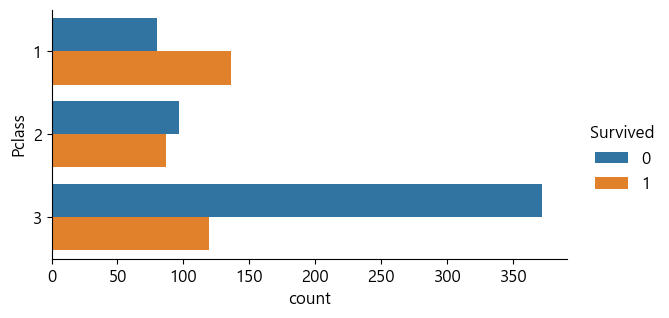

In [208]:
g = sb.catplot(data=df,
            y='Pclass',     # 집단을 구분하는 기준
            kind='count',    # 빈도 막대그래프 그리기
            hue='Survived'
        )

g.fig.set_figwidth(7)
g.fig.set_figheight(3)

plt.show()
plt.close()

- Countplot : catplot에서 kind가 count로 고정되어 있는 형태

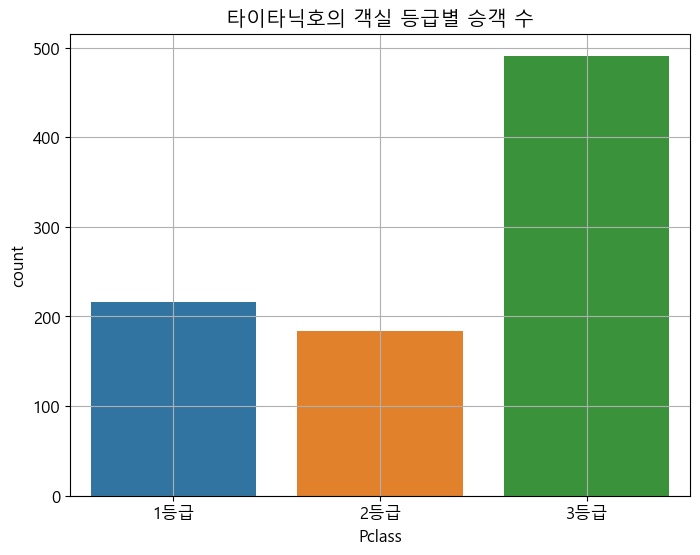

In [209]:
plt.figure()
sb.countplot(data=df, x="Pclass")
plt.title("타이타닉호의 객실 등급별 승객 수")
plt.xticks([0, 1, 2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()
plt.close()

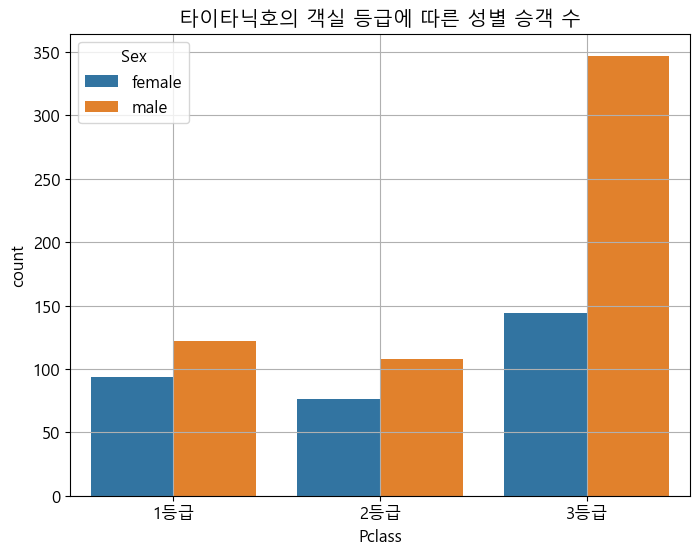

In [212]:
plt.figure()
sb.countplot(data=df, x="Pclass", hue='Sex')
plt.title("타이타닉호의 객실 등급에 따른 성별 승객 수")
plt.xticks([0, 1, 2], ['1등급', '2등급', '3등급'])
plt.grid()
plt.show()
plt.close()

- lmplot : scatterplot의 발전형
  - 산점도 행렬을 출력할 수 있음

In [213]:
df2 = pd.read_excel("./data/penguins.xlsx")

In [223]:
df2 = df2.astype({"species" : "category", "island" : "category", "sex" : "category"})
df2.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm       int64
body_mass_g             int64
sex                  category
dtype: object

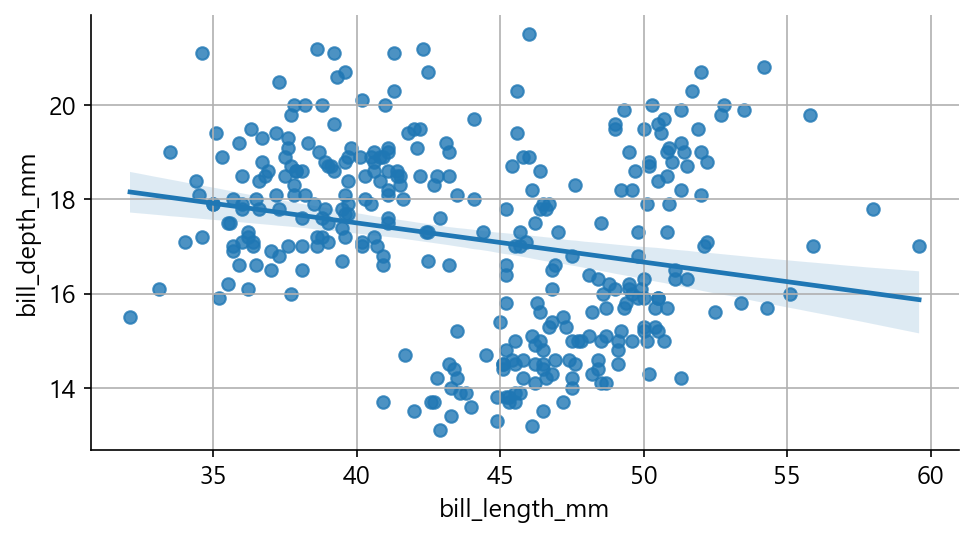

In [225]:
g = sb.lmplot(data = df2, x = 'bill_length_mm', y = 'bill_depth_mm')
g.fig.set_figwidth(7)
g.fig.set_figheight(3.5)
g.fig.set_dpi(150)

plt.grid()
plt.show()

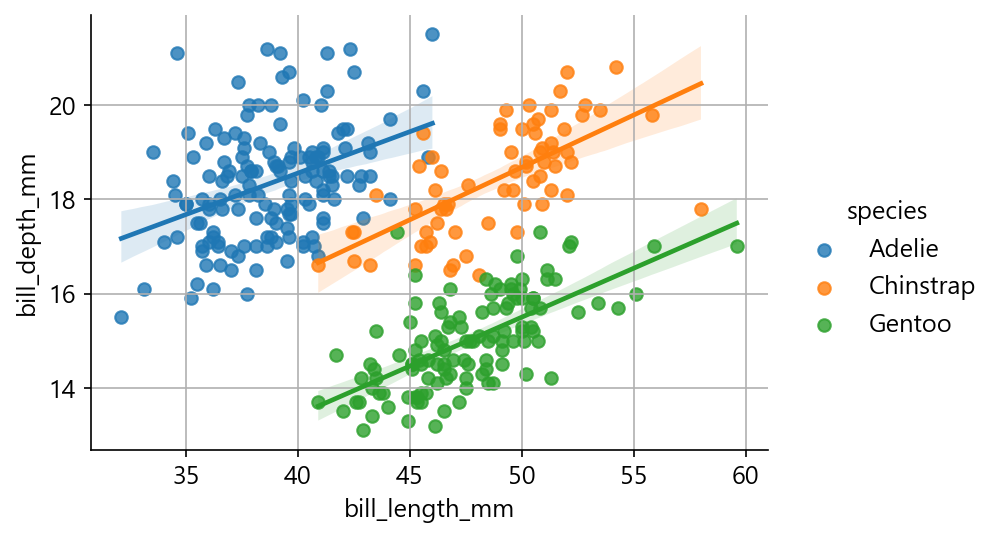

In [226]:
g = sb.lmplot(data = df2, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species')
g.fig.set_figwidth(7)
g.fig.set_figheight(3.5)
g.fig.set_dpi(150)

plt.grid()
plt.show()

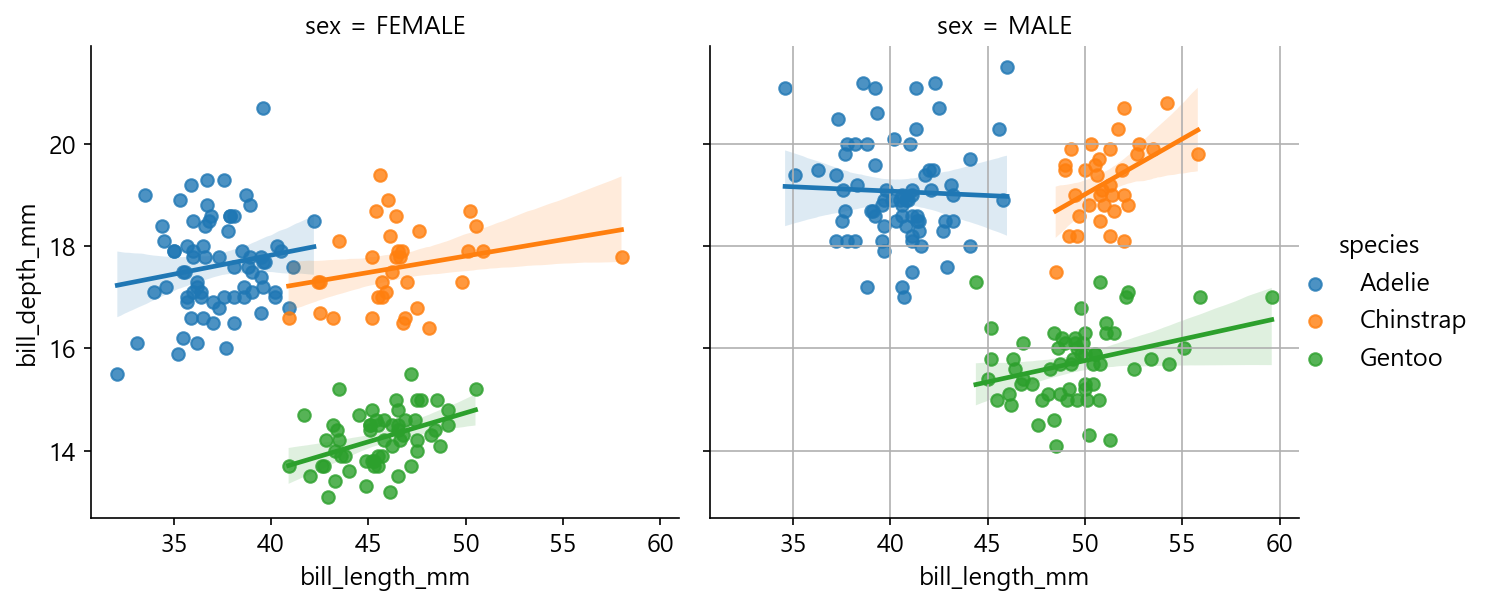

In [232]:
g = sb.lmplot(data = df2, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species', col = 'sex')
g.fig.set_figwidth(10)
g.fig.set_figheight(4)
g.fig.set_dpi(150)

plt.grid()
plt.show()

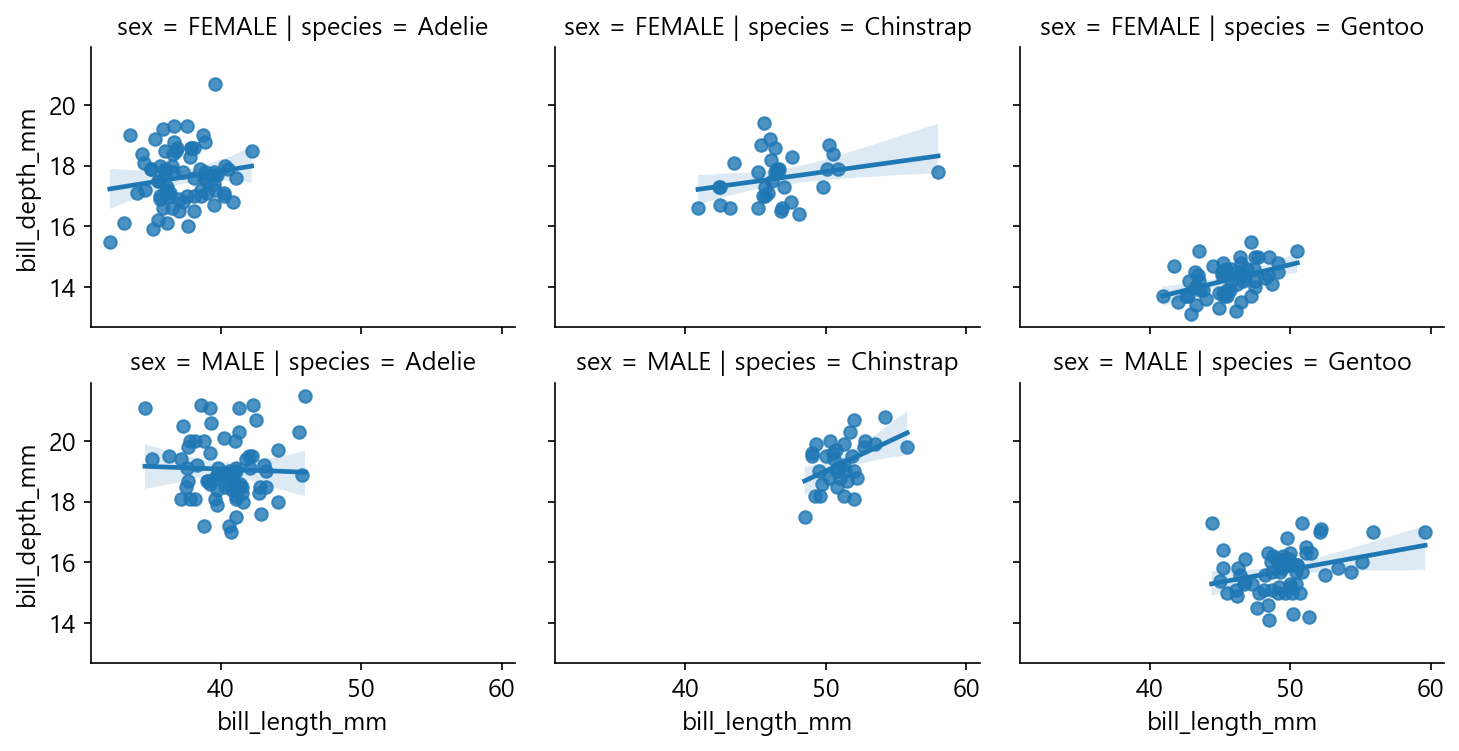

In [233]:
g = sb.lmplot(data=df2, x="bill_length_mm", y="bill_depth_mm",
              col="species", row='sex', height=3)
g.fig.set_figwidth(10)
g.fig.set_figheight(5)
g.fig.set_dpi(150)

plt.show()
plt.close()

- pairplot

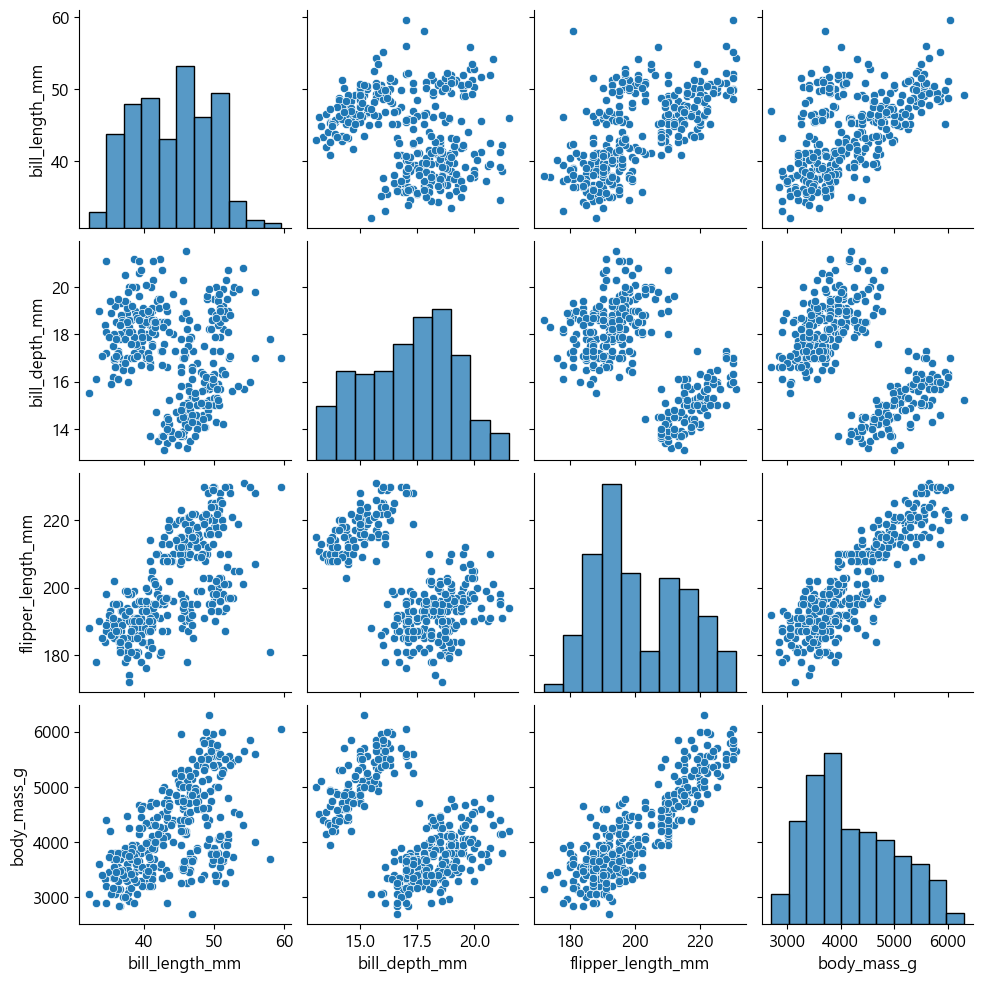

In [234]:
sb.pairplot(df2)
plt.show()

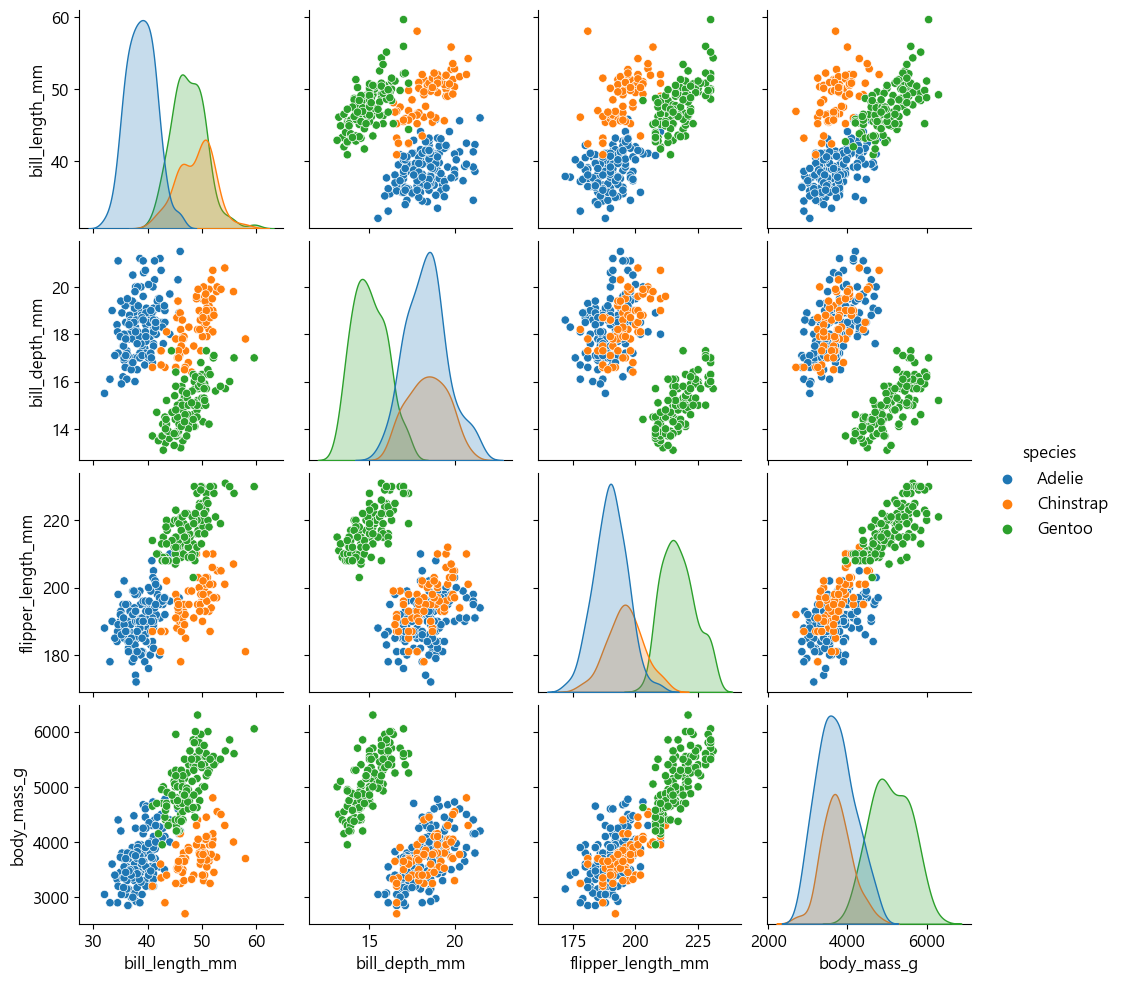

In [235]:
sb.pairplot(df2, hue = 'species')
plt.show()

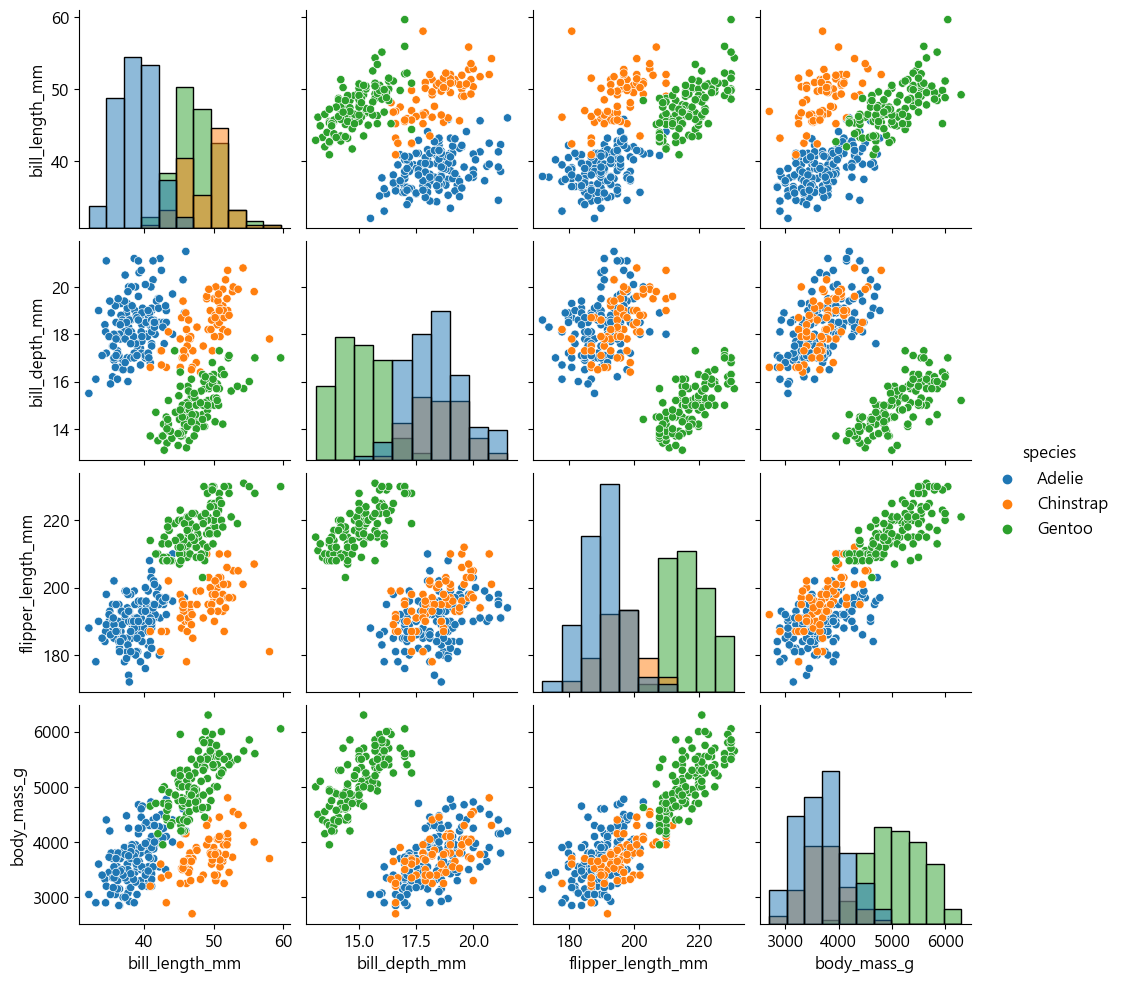

In [236]:
sb.pairplot(df2, hue = 'species', diag_kind = 'hist')
plt.show()

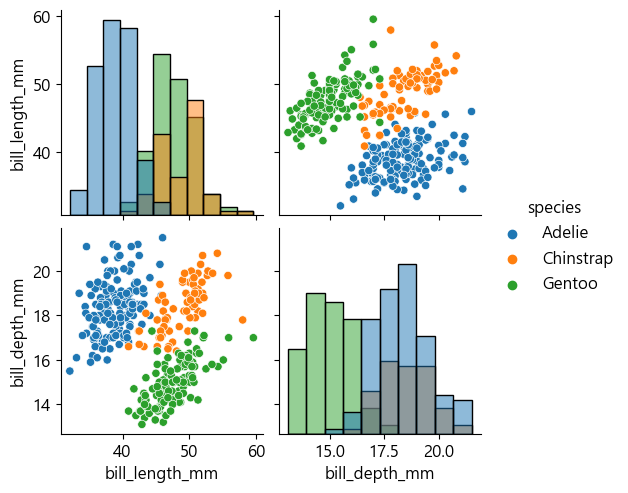

In [237]:
sb.pairplot(df2, hue = 'species', diag_kind = 'hist', 
            x_vars = ['bill_length_mm', 'bill_depth_mm'],
            y_vars = ['bill_length_mm', 'bill_depth_mm'],
            )
plt.show()

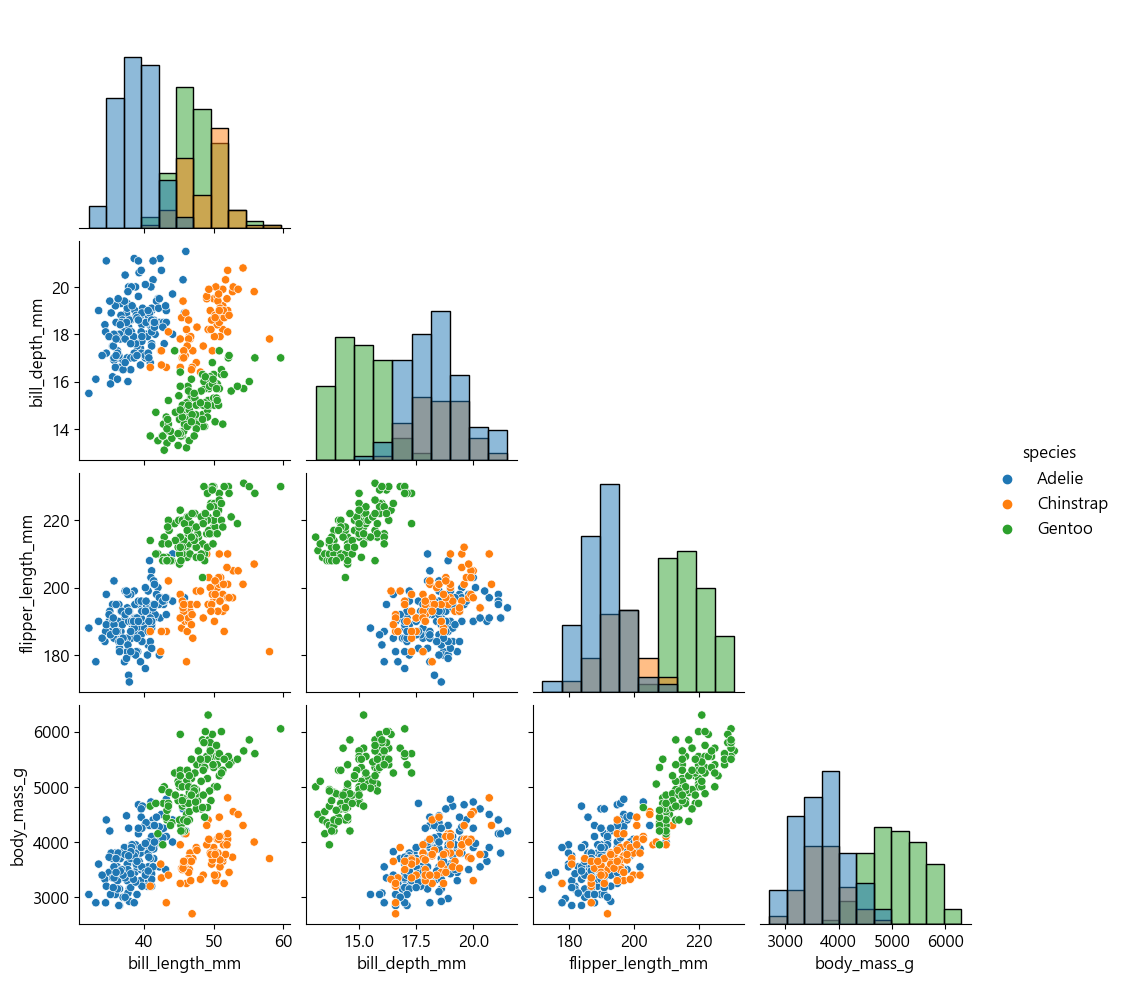

In [238]:
sb.pairplot(df2, hue = 'species', diag_kind = 'hist', corner = True)
plt.show()

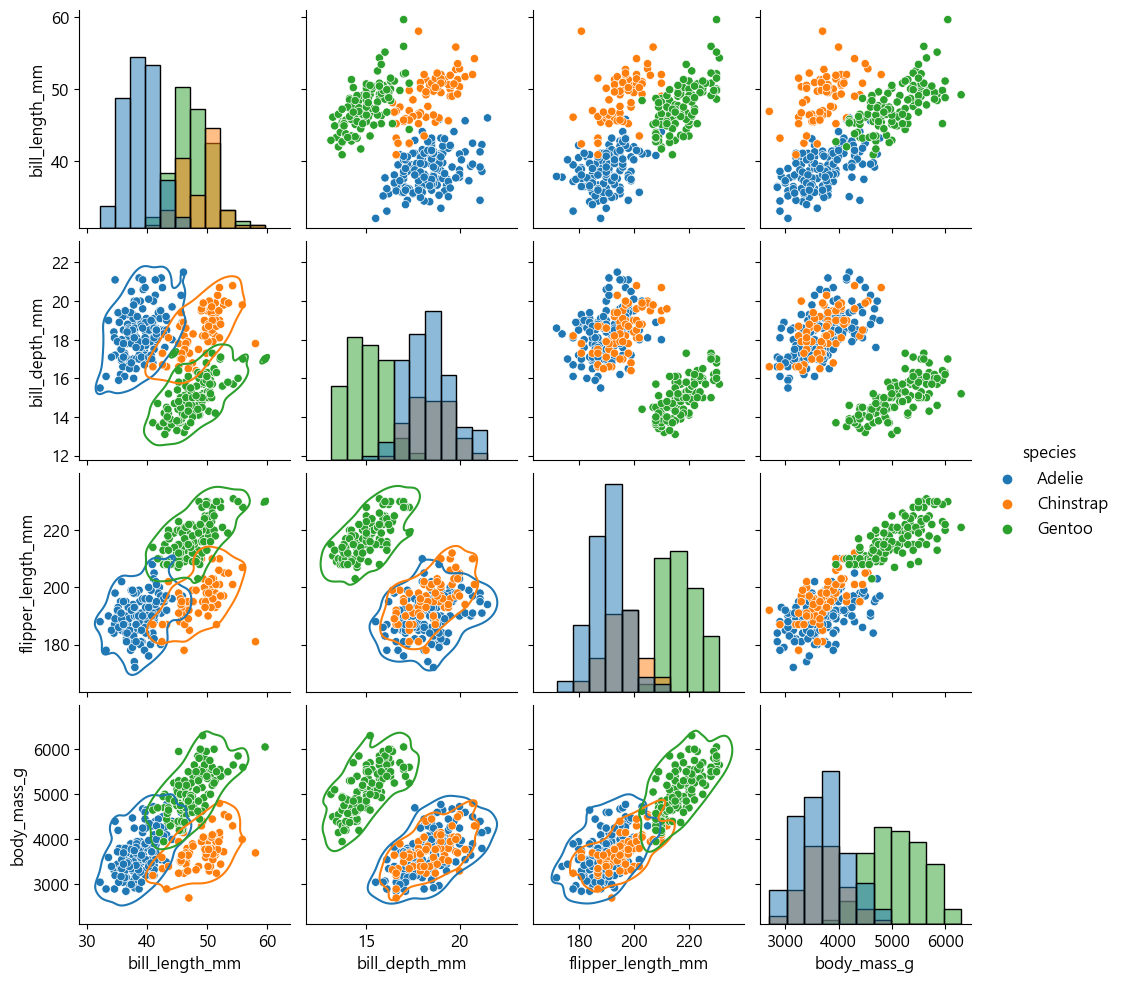

In [239]:
g = sb.pairplot(df2, hue = 'species', diag_kind = 'hist')
g.map_lower(sb.kdeplot, levels = 1, color = 0.2)
plt.show()

In [242]:
from sklearn.model_selection import GridSearchCV

In [243]:
?GridSearchCV

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of